# Pymaceuticals Inc.
---

### Analysis
This project had us looking at the results that occured after taking 249 mice and having them be involved in different drug experiments. Here was what was observed from analyzing and organzing all the data provided. 
- Correlation between the weight of the mice and average tumor volume is 0.84, showing a postive correlation. The heavier the mouse, the bigger the tumor volume will be.
- After analyzing the data and looking at the created box plots, it is shown that Capomulin and Ramicane are the most effective, due to their final tumor volume (and upper and lower quartiles) are less than the other two treatments.
- Looking at these same box plots, it is shown that Infubinol and Ceftamin are the least effective, due to their final tumor volume (and upper and lower quartiles) being higher than the other two.
- Male vs female mice totals are almost 50/50

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_number = len(combined_data["Mouse ID"].unique())
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_ID = combined_data.loc[combined_data["Mouse ID"]=="g989", :]
duplicate_mice_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data = clean_mice['Mouse ID'].value_counts()
clean_data_info = len(clean_data)
clean_data_info

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_data = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).mean()
median_data = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).median()
variance_data = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).var()
std_data = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).std()
sem_data = clean_mice['Tumor Volume (mm3)'].groupby(clean_mice['Drug Regimen']).sem()

summary_data = pd.DataFrame({"Mean Tumor Volume":mean_data,
                            "Median Tumor Volume":median_data,
                            "Tumor Volume Variance":variance_data,
                            "Tumor Volume Std. Dev.":std_data,
                            "Tumor Volume Std. Err.":sem_data})

summary_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_method = clean_mice.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
aggregation_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Mouse ID/Timepoints (Pandas)')

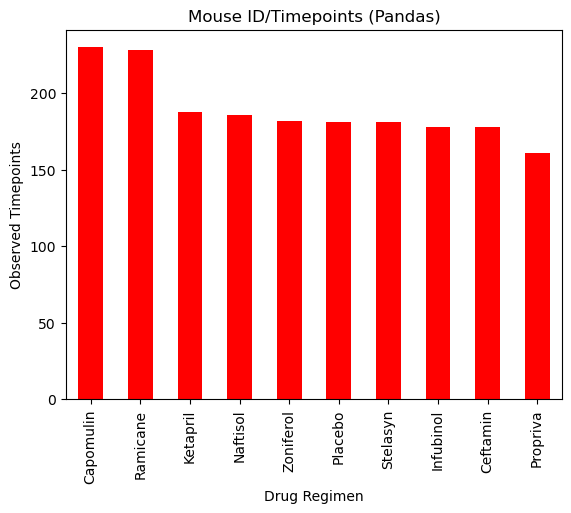

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_count = clean_mice["Drug Regimen"].value_counts()
bar_plot = pandas_count.plot.bar(color = 'r')

plt.xlabel("Drug Regimen")
plt.ylabel("Observed Timepoints")
plt.title("Mouse ID/Timepoints (Pandas)")


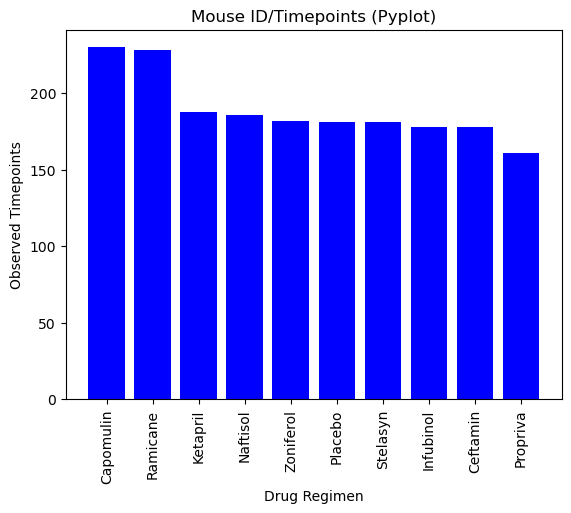

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = pandas_count.index.values
y_axis = pandas_count.values

plt.bar(x_axis, y_axis, color = "b", alpha =1, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Observed Timepoints")
plt.xticks(rotation="vertical")
plt.title("Mouse ID/Timepoints (Pyplot)")
plt.show()

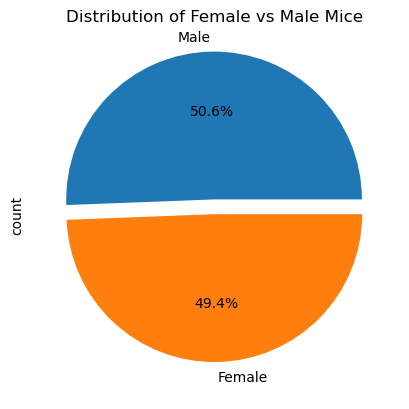

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_mice["Sex"].value_counts()
plt.title("Distribution of Female vs Male Mice")
explode = (0.10,0)
mice_gender.plot.pie(autopct="%1.1f%%", explode=explode)
plt.show()

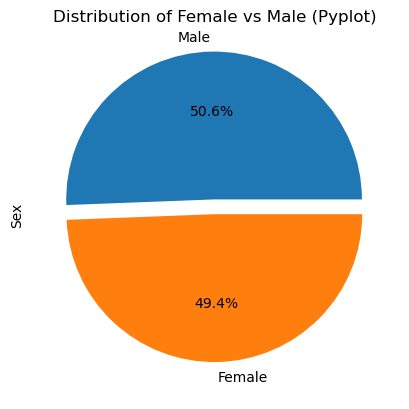

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender = clean_mice["Sex"].value_counts()
labels= ["Male", "Female"]
explode=(0.10,0)
plt.pie(mice_gender, labels=["Male","Female"], autopct="%1.1f%%", explode=explode)
plt.ylabel("Sex")
plt.title("Distribution of Female vs Male (Pyplot)")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_mice.groupby('Mouse ID')
greatest_timepoint = greatest_timepoint['Timepoint'].max()
greatest_data = pd.DataFrame(greatest_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(greatest_data, clean_mice, on = ['Mouse ID', 'Timepoint'])
tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_capomulin = []
tumor_volume_ramicane = []
tumor_volume_infubinol = []
tumor_volume_ceftamin = []

tumor_loop = [tumor_volume_capomulin, tumor_volume_ramicane, tumor_volume_infubinol, tumor_volume_ceftamin]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for e in range (len(tumor_volume)-1):
    if tumor_volume.loc[e, "Drug Regimen"] == "Capomulin":
        tumor_volume_capomulin.append(tumor_volume.loc[e, "Tumor Volume (mm3)"])
    if tumor_volume.loc[e, "Drug Regimen"] == "Ramicane":
        tumor_volume_ramicane.append(tumor_volume.loc[e, "Tumor Volume (mm3)"])
    if tumor_volume.loc[e, "Drug Regimen"] == "Infubinol":
        tumor_volume_infubinol.append(tumor_volume.loc[e, "Tumor Volume (mm3)"])
    if tumor_volume.loc[e, "Drug Regimen"] == "Ceftamin":
        tumor_volume_ceftamin.append(tumor_volume.loc[e, "Tumor Volume (mm3)"])

  # Determine outliers using upper and lower bounds
outlier = []
for e in range(len(tumor_loop)):
    quartiles = pd.Series(tumor_loop[e]).quantile([.25,.5,.75])
    lowerquart= quartiles[0.25]
    upperquart= quartiles[0.75]
    IQR= upperquart-lowerquart
    print(f"\n{treatments[e]}:")
    
    print(f"Upper quartile of tumor volume is:{upperquart}")
    print(f"Lower quartile of tumor volume is: {lowerquart}")
    print(f"IQR of tumor volume is: {IQR}")
    print(f"Median is: {quartiles[0.5]}")
    
    upper_bound = upperquart + (1.5*IQR)
    lower_bound = lowerquart - (1.5*IQR)
    print(f"Values above {upper_bound} might be outliers")
    print(f"Values below {lower_bound} might be outliers")

    
for g in range(len(tumor_loop[e])):
    if (tumor_loop[e][g] > upper_bound) or (tumor_loop[e][g] < lower_bound):
        outlier = tumor_loop[e][g]
        outlier.append(outlier)
        print(f"Outliers are {outlier}")



Capomulin:
Upper quartile of tumor volume is:40.1592203
Lower quartile of tumor volume is: 32.37735684
IQR of tumor volume is: 7.781863460000004
Median is: 38.1251644
Values above 51.83201549 might be outliers
Values below 20.70456164999999 might be outliers

Ramicane:
Upper quartile of tumor volume is:40.65900627
Lower quartile of tumor volume is: 31.56046955
IQR of tumor volume is: 9.098536719999998
Median is: 36.56165229
Values above 54.30681135 might be outliers
Values below 17.912664470000003 might be outliers

Infubinol:
Upper quartile of tumor volume is:65.52574285
Lower quartile of tumor volume is: 54.04860769
IQR of tumor volume is: 11.477135160000003
Median is: 60.16518046
Values above 82.74144559000001 might be outliers
Values below 36.83290494999999 might be outliers

Ceftamin:
Upper quartile of tumor volume is:64.29983003
Lower quartile of tumor volume is: 48.72207785
IQR of tumor volume is: 15.577752179999997
Median is: 59.85195552
Values above 87.66645829999999 might be

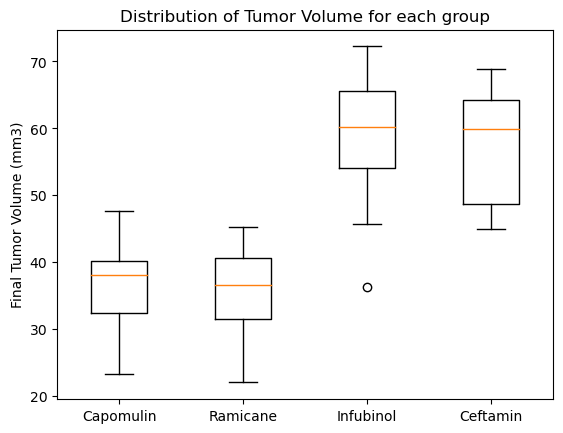

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Distribution of Tumor Volume for each group")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_loop)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

In [16]:
# created list for next part
tumor_volume.loc[tumor_volume["Drug Regimen"] == "Capomulin"].head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2


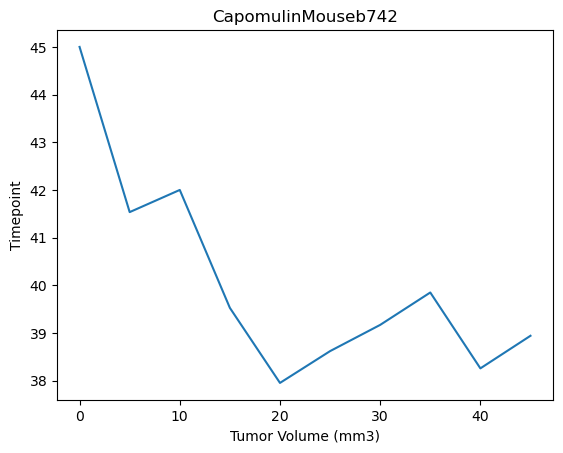

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
def line_plot(regimen, mouse_ID):
    regimen_plot = clean_mice.loc[clean_mice["Drug Regimen"]== regimen]
    id_info = regimen_plot.loc[regimen_plot["Mouse ID"] == mouse_ID]
    
    plt.plot(id_info['Timepoint'],id_info['Tumor Volume (mm3)'])
    plt.xlabel("Tumor Volume (mm3)")
    plt.ylabel("Timepoint")
    plt.title(regimen + "Mouse" + mouse_ID)
    plt.show()
line_plot("Capomulin", "b742")

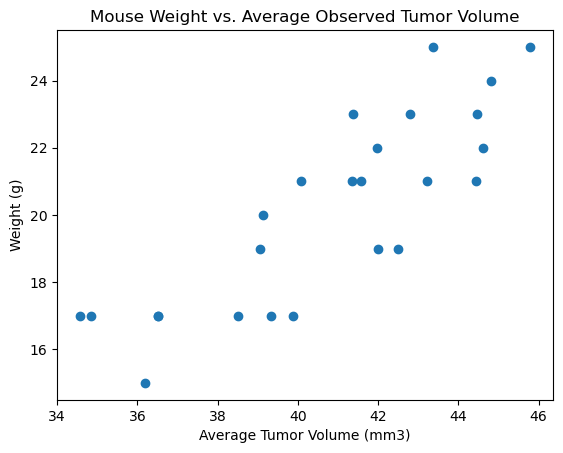

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_scatter = clean_mice.loc[clean_mice['Drug Regimen'] == "Capomulin"].groupby('Mouse ID')
capomulin_average = capomulin_scatter['Tumor Volume (mm3)']. mean()
weight = capomulin_scatter['Weight (g)'].unique()
plt.scatter(capomulin_average, weight)
plt.xlabel ("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Mouse Weight vs. Average Observed Tumor Volume")
plt.show()

## Correlation and Regression

Correlation between weight and average tumor volume is 0.84.


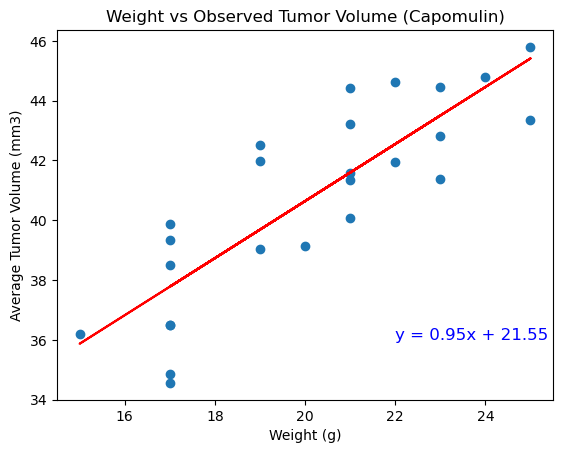

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = weight.astype(float)
correlation = st.pearsonr(weight, capomulin_average)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, capomulin_average)
regress_values = weight * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight, capomulin_average)
plt.plot(weight, regress_values, "r-")
plt.annotate(line_equation, (22, 36), fontsize=12, color="blue")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Observed Tumor Volume (Capomulin)")
print(f"Correlation between weight and average tumor volume is {round(correlation[0], 2)}.")
plt.show()
